<a href="https://colab.research.google.com/github/lucreziacerto/EL_project/blob/practice/NEW_NY_bnb_pricing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEW YORK PRICING PREDICTIONS

In [171]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt  # useful for data vizualisation
import seaborn as sns

import datetime

In [172]:
# import necessary libraries

import pandas as pd
import numpy as np
import os
import glob

# for modeling
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
import xgboost as xg
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AutoReg


# for scoring
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
dt =  pd.read_csv('AB_NYC_2019.csv')

In [17]:
dt.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


## DATA EXPLORATION

In [ ]:
print(list(dt))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [6]:
dt.dtypes

id                                  int64
name                               object
host_id                           float64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [ ]:
dt['calculated_host_listings_count'].unique()

array([  6.,   2.,   1.,   4.,   3.,   5.,   7.,  13.,  28.,  11.,   8.,
         9.,  52.,  18.,  15.,  19.,  10.,  39.,  26.,  29.,  12.,  21.,
        96.,  14.,  34.,  43., 121.,  37.,  49.,  31.,  91.,  16.,  87.,
        33.,  23.,  nan])

In [ ]:
dt.isna().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
dt[dt[['host_id','room_type']].duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80.0,1.0,39.0,2019-01-01,0.37,6.0,364.0
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110.0,2.0,71.0,2019-07-02,0.61,6.0,304.0
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50.0,3.0,273.0,2019-07-01,2.37,3.0,359.0
35,10962,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89.0,4.0,168.0,2019-06-21,1.41,3.0,340.0
58,15338,Room in Greenpoint Loft w/ Roof,32169,Andrea,Brooklyn,Greenpoint,40.72401,-73.93788,Private room,49.0,4.0,138.0,2019-06-04,1.19,3.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22035,17730019,HALSEY HAVEN,101435219,Gretchen,Brooklyn,Bedford-Stuyvesant,40.68607,-73.92392,Entire home/apt,161.0,2.0,45.0,2019-06-24,1.65,2.0,270.0
22036,17730390,Bedroom in Brooklyn Communal House,13416818,Emma,Brooklyn,Bedford-Stuyvesant,40.68116,-73.95726,Private room,45.0,2.0,14.0,2017-09-30,0.51,3.0,0.0
22045,17735639,Adorable Bright Private Bedroom.,4204783,Kevin,Staten Island,West Brighton,40.63149,-74.12393,Private room,49.0,2.0,32.0,2019-06-29,1.14,3.0,315.0
22049,17738174,Bayside Room w/ 1 Bed,116746802,Christine,Queens,Bayside,40.74924,-73.75654,Private room,49.0,3.0,29.0,2019-06-16,1.07,5.0,96.0


In [ ]:
dt[dt['host_id']==32294]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50.0,3.0,242.0,2019-06-01,2.04,3.0,355.0
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50.0,3.0,273.0,2019-07-01,2.37,3.0,359.0
100,22918,loft bed - near transportation-15min to times sq,32294,Ssameer Or Trip,Manhattan,Harlem,40.82279,-73.95139,Private room,60.0,3.0,11.0,2019-01-03,0.87,3.0,219.0


In [ ]:
dt[dt['calculated_host_listings_count']<2]['host_id'].nunique()

15823

In [ ]:
dt[dt['availability_365']<30]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120.0,90.0,27.0,2018-10-31,0.22,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22050,17738717,Clean Cosy Bedroom w/Desk 10min to JFK & Big Mall,6166708,Christine & Einstein,Queens,Rosedale,40.65252,-73.73425,Private room,22.0,1.0,59.0,2019-05-17,2.10,1.0,0.0
22051,17739111,Living Room in 2 Bedroom Apartment Brighton Beach,119523037,Anna,Brooklyn,Brighton Beach,40.58017,-73.96160,Shared room,50.0,1.0,1.0,2017-09-13,0.05,4.0,1.0
22055,17746222,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65.0,2.0,18.0,2018-11-04,0.64,1.0,0.0
22056,17748284,Guest BedRm in quaint NYC neighborhood. NEAR T...,25196982,Nikolas,Queens,Astoria,40.76924,-73.91702,Private room,65.0,1.0,11.0,2019-06-17,3.24,1.0,9.0


In [ ]:
dt[dt['availability_365']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120.0,90.0,27.0,2018-10-31,0.22,1.0,0.0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299.0,3.0,9.0,2011-12-28,0.07,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22047,17737245,Chic & zen room in a very clean Brooklyn apt,43045034,Thuy,Brooklyn,Bedford-Stuyvesant,40.69660,-73.93839,Private room,70.0,3.0,27.0,2019-06-01,1.81,1.0,0.0
22048,17737925,Extra Cosy Room in Williamsburg,120989542,Arthur,Brooklyn,Williamsburg,40.70626,-73.95212,Private room,60.0,4.0,3.0,2017-08-07,0.12,1.0,0.0
22050,17738717,Clean Cosy Bedroom w/Desk 10min to JFK & Big Mall,6166708,Christine & Einstein,Queens,Rosedale,40.65252,-73.73425,Private room,22.0,1.0,59.0,2019-05-17,2.10,1.0,0.0
22055,17746222,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65.0,2.0,18.0,2018-11-04,0.64,1.0,0.0


In [ ]:
print(list(dt))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


<AxesSubplot:ylabel='Density'>

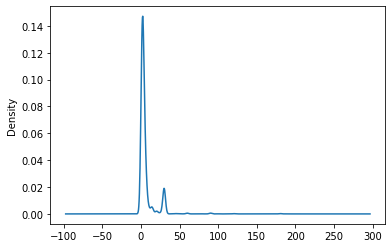

In [ ]:
dt[dt['minimum_nights']<200]['minimum_nights'].plot(kind='kde')

In [ ]:
dt[dt['minimum_nights']>180].count()

id                                54
name                              53
host_id                           54
host_name                         54
neighbourhood_group               54
neighbourhood                     54
latitude                          54
longitude                         54
room_type                         54
price                             54
minimum_nights                    54
number_of_reviews                 54
last_review                       36
reviews_per_month                 36
calculated_host_listings_count    54
availability_365                  54
dtype: int64

In [ ]:
dt['availability_365'].describe()

count    22058.000000
mean       103.508614
std        132.634612
min          0.000000
25%          0.000000
50%          9.000000
75%        221.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
dt['reviews_per_month'].describe()

count    18358.000000
mean         0.944976
std          1.297014
min          0.010000
25%          0.100000
50%          0.360000
75%          1.310000
max         16.220000
Name: reviews_per_month, dtype: float64

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

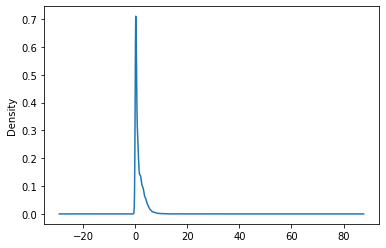

In [129]:

# dt[dt['number_of_reviews']<100]['number_of_reviews'].plot(kind='kde')

dt['reviews_per_month'].plot(kind='kde')

dt['reviews_per_month'].describe()

In [ ]:
dt[dt['number_of_reviews']>100].count()

id                                2658
name                              2658
host_id                           2658
host_name                         2656
neighbourhood_group               2658
neighbourhood                     2658
latitude                          2658
longitude                         2658
room_type                         2658
price                             2658
minimum_nights                    2658
number_of_reviews                 2658
last_review                       2658
reviews_per_month                 2658
calculated_host_listings_count    2658
availability_365                  2658
dtype: int64

In [ ]:
dt[dt['number_of_reviews']==0].count()

id                                3700
name                              3690
host_id                           3700
host_name                         3698
neighbourhood_group               3700
neighbourhood                     3700
latitude                          3700
longitude                         3700
room_type                         3700
price                             3700
minimum_nights                    3700
number_of_reviews                 3700
last_review                          0
reviews_per_month                    0
calculated_host_listings_count    3700
availability_365                  3700
dtype: int64

In [ ]:
dt[dt['number_of_reviews']>0]['number_of_reviews'].describe()

count    18358.000000
mean        42.997658
std         62.031990
min          1.000000
25%          4.000000
50%         15.000000
75%         59.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [ ]:
dt['room_type'].value_counts()

Entire home/apt    12102
Private room        9610
Shared room          346
Name: room_type, dtype: int64

In [ ]:
dt[dt['host_id']==244361589]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
dt[dt['price'].isna()]

,latitude,longitude,price,reviews_per_month,mean_price_per_host,Bronx,Brooklyn,Manhattan,Queens,Staten Island,...,short_term_lease,professional,seasonal,vacation,multiprop,rookie,super_host,n_days,number_of_reviews_quant,zero_reviews
22058,40.86348,-73.0,NaN,0.0,199.0,0,0,1,0,0,...,0,1,0,0,0,0,1,188.0,4,0


In [6]:
dt.shape

(22059, 16)

In [7]:
Q1_p= dt['price'].quantile(0.25)
Q3_p = dt['price'].quantile(0.75)
IR = (Q3_p-Q1_p)*2.5
x = dt[dt['price']>Q3_p+IR]

In [15]:
x

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800.0,1.0,25.0,2016-08-04,0.24,1.0,7.0
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500.0,4.0,46.0,2019-05-18,0.55,2.0,243.0
158,38663,Luxury Brownstone in Boerum Hill,165789,Sarah,Brooklyn,Boerum Hill,40.68559,-73.98094,Entire home/apt,475.0,3.0,23.0,2018-12-31,0.27,1.0,230.0
233,60164,"Beautiful, elegant 3 bed SOHO loft",289653,Harrison,Manhattan,SoHo,40.72003,-74.00262,Entire home/apt,500.0,4.0,94.0,2019-06-23,0.99,1.0,329.0
242,61224,Huge Chelsea Loft,291112,Frank,Manhattan,Chelsea,40.74358,-74.00027,Entire home/apt,500.0,2.0,35.0,2017-07-27,0.34,1.0,348.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21821,17537893,The Otheroom Bar/Event/Filming Space -read det...,18037301,James,Manhattan,West Village,40.73571,-74.00780,Entire home/apt,4000.0,1.0,0.0,NaN,NaN,1.0,173.0
21848,17554541,Delightful Brooklyn townhouse,5817532,Christy,Brooklyn,Park Slope,40.68326,-73.97796,Entire home/apt,600.0,6.0,7.0,2019-01-03,0.36,1.0,42.0
21890,17601315,Modern 2br Apartment in the heart of Soho/Nolita,975819,Chendi,Manhattan,Nolita,40.72118,-73.99602,Entire home/apt,500.0,2.0,0.0,NaN,NaN,1.0,0.0
21925,17632790,Coney Island Private Assembly Special Events,114736959,Ed,Brooklyn,Coney Island,40.57577,-73.98553,Entire home/apt,450.0,1.0,5.0,2019-06-23,0.42,6.0,364.0


In [8]:
x.groupby('room_type').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,,
Entire home/apt,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,921,921,1413,1413
Private room,194,194,194,194,194,194,194,194,194,194,194,85,85,194,194
Shared room,12,12,12,12,12,12,12,12,12,12,12,6,6,12,12


In [9]:
dt.groupby('room_type').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,,
Entire home/apt,12102,12096,12102,12095,12102,12102,12102,12102,12102,12102,12102,10257,10257,12102,12102
Private room,9610,9602,9610,9603,9610,9610,9610,9610,9610,9610,9610,7838,7838,9610,9610
Shared room,346,345,346,346,346,346,346,346,346,346,346,263,263,346,346


## FEATURE ENGINEERING

columns to create:

'id': leave, potentially drop it at the end. 

'name': leave, potentially drop it at the end.

'host_id': add column with avg price host listing, then drop it; YU

'host_name': leave potentially drop

'neighbourhood_group': one hot encode YU

'neighbourhood': one hot encode YU

'latitude', 'longitude': leave

'room_type': one hot encode YU

'price': target variable, leave

'minimum_nights': one hot encoding in categories. 1-30 days (vacation), 30-360 days (short term lease), >360 (long term) YU

'number_of_reviews': quantile encoding + "0 reviews column" LU

'**last_review**': number of days since 2019/07/08 LU

'reviews_per_month': null values as 0 and normalize LU 

'**calculated_host_listings_count**': one hot encoding for number of listings (1,2-10, >10) LU

'**availability_365**': encode -  event (< 30 days), seasonal (30-180 days), professional (>180 days) LU





In [14]:
#DEFINE THE CATEGORY THRESHOLDS: 

#MIN NIGHTS: we want to define three categories based on client behavior
#1-30 days = vacation
#30-360 days = short term lease
#>360 days = long term lease
vacation_threshold = 30
short_term_threshold = 360


#AVAILABILITY_36: we want to define three categories based on renter behavior
#1-30 days = event
#30-180 days = seasonal
#>180 days = professional
event_threshold = 30
seasonal_threshold = 180

#CALCULATED HOST LISTING COUNT: we want to define three categories based on renter behavior
#1 listing: rookie host
#2-10 listings: multi property host
#>10 listings: super host
rookie_threshold = 1
multiprop_threshold = 10


In [15]:
#MAPPING FUNCTIONS
# create a function to map the min_nights values to the appropriate category
def categorize_min_nights(nights):
    if nights <= event_threshold:
        return 'event'
    elif nights <= short_term_threshold:
        return 'short_term_lease'
    else:
        return 'long_term'

# create a function to map the availability_365 values to the appropriate category
def categorize_availabilty(days):
    if days <= vacation_threshold:
        return 'vacation'
    elif days <= seasonal_threshold:
        return 'seasonal'
    else:
        return 'professional'

# create a function to map the number of listings values to the appropriate category
def categorize_listing_count(listing):
    if listing == rookie_threshold:
        return 'rookie'
    elif listing <= multiprop_threshold:
        return 'multiprop'
    else:
        return 'super_host'

## PREPROCESSING

In [185]:

def preprocessing(data):
    df = data.copy()
    

    df['neighbourhood_room'] = df['neighbourhood']+ df['room_type']
    
    neigh_room_mean = df.groupby(['neighbourhood_room'])['price'].mean()

    neigh_room_median_dict = neigh_room_mean.to_dict()

    median_per_host = df[df['calculated_host_listings_count'] > 1].groupby('host_id')['price'].mean()
    
    #VARIABLE - HOST ID
    # Calculate the mean price for each room type in each neighbourhood
    # df['neighbourhood_room'] = df['neighbourhood']+ df['room_type']
    # neigh_room_median = df.groupby(['concat'])['price'].median()


    # Map the means to the neighbourhood_group and room_type columns
    df['mean_price_neigh_room'] = df['host_id'].map(median_per_host)
    # print(df['neighbourhood_room'])
    df['mean_price_neigh_room'] = df['mean_price_neigh_room'].fillna(df['neighbourhood_room'].map(neigh_room_median_dict))
    
    #VARIABLES TO HOT ENCODE: minimum_nights, availability_365, calculated_host_listings_count, neighbourhood_group, neighbourhood, room_type 
    # apply the categorize_min_nights function to the minimum_nights column and create one hot encoded columns
    df['min_nights_category'] = df['minimum_nights'].apply(categorize_min_nights)
    df['availability_365_category'] = df['availability_365'].apply(categorize_availabilty)
    df['listing_category'] = df['calculated_host_listings_count'].apply(categorize_listing_count)
    
    one_hot_encode_columns = ['neighbourhood_group', 'neighbourhood', "room_type",'min_nights_category','availability_365_category','listing_category']
    
    #one hot encoding variables
    for i in one_hot_encode_columns:
        one_hot_encoded = pd.get_dummies(df[i])
        df = pd.concat([df, one_hot_encoded], axis=1)
    
    #VARIABLE - LAST REVIEW
    #transforming column into datetime type
    df['last_review'] = pd.to_datetime(df['last_review'])
    #reference day to compute days from
    day = datetime.datetime(2019, 7, 8)

    #computing the number of days since the last review
    df['n_days'] = (day - df['last_review'])/np.timedelta64(1, 'D')

    #filling the missing values with the median 
    df['n_days'] = df['n_days'].fillna(df['n_days'].median())
    
    #normalizing it
    df['n_days_log'] = np.log10(df['n_days']+1)
    df= df.drop(columns=['n_days'])

    #VARIABLE - REVIEWS PER MONTH
    #filling the missing values
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

    #detecting the outliers
    Q1_rev = df['reviews_per_month'].quantile(0.25)
    Q3_rev = df['reviews_per_month'].quantile(0.75)
    IQR = Q3_rev - Q1_rev
    whisker_width = 1.5
    upper_whisker = Q3_rev + (whisker_width*IQR)
    
    

    # #capping the outliers
    df.loc[df['reviews_per_month'] > upper_whisker, 'reviews_per_month'] = upper_whisker
    


    #VARIABLE - NUMBER OF REVIEWS
    #quantile encoding
    Q1 = df['number_of_reviews'].quantile(0.25)
    Q2 = df['number_of_reviews'].quantile(0.5)
    Q3 = df['number_of_reviews'].quantile(0.75)

    df['number_of_reviews_quant'] = np.where((df.number_of_reviews <= Q1), 1,   
                 np.where((df.number_of_reviews>Q1) & (df.number_of_reviews<=Q2), 2,
                  np.where((df.number_of_reviews>Q2) & (df.number_of_reviews<=Q3), 3,
                    4)))  
    
    #keeping track of the rows with no reviews
    df['zero_reviews'] = np.where(df.number_of_reviews == 0,1,0) 

    #remove the outliers or prices
    Q1_p= df['price'].quantile(0.25)
    Q3_p = df['price'].quantile(0.75)
    IR = (Q3_p-Q1_p)*1.5
    df = df[df['price']<Q3_p+IR]



    #dropping the columns that are no longer needed
    df = df.drop(['id', 'name', "host_id", "host_name", 'neighbourhood_group', 'neighbourhood', "room_type", 'min_nights_category','availability_365_category','listing_category','minimum_nights','availability_365','calculated_host_listings_count','last_review','number_of_reviews','neighbourhood_room' ], axis = 1)
    
    return df

In [186]:
dt_pre = preprocessing(dt)


In [187]:
X_df = dt_pre.drop(columns=['price'])
y_df = dt_pre['price']

## TRAIN TEST SPLIT

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=100)

# Helper functions

In [177]:
def get_cartesian(lat=None,lon=None):
    '''
    Converts latitude and longitude arrays into (x,y,z) coordinates
    Input :
          latitude as array
          longitude as array
    Output :
          x,y,z cartesian coordinates
    '''
    # Change degrees to radians
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    R = 1 # radius of the earth = 6371 km but not needed as we will normalize

    # Convert to cartesian
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    z = R *np.sin(lat)

    return x,y,z



def scores(y_true,y_pred, plot=False):
  '''
  Compute MAE, MSE, RMSE, R2 and MAPE scores and plot prediction errors
  Inputs :
        y_true : true target values
        y_pred : predictions
        plot: if True plots errors
  Outputs:
        A score dictionary containing the computed metrics
  '''
  #Compute MAE, MSE, RMSE, R2 and MAPE scores
  mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
  mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
  rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
  r2 = r2_score(y_true=y_true, y_pred=y_pred)
  mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
  error_ratio_rmse = rmse/np.mean(y_true)
  error_ratio_mae = mae/np.mean(y_true)

  # Plot the obtained errors and residuals if plot argument is set to True
  if plot:
      fig, axs = plt.subplots(ncols=2,figsize=(15,5))
      x = np.arange(np.amin(y_true),np.amax(y_true))
      axs[0].scatter(y_pred,y_true,label="actual_vs_predicted")
      axs[0].plot(x,x,color='black',linestyle='dashed')
      axs[0].set_title("Actual vs. Predicted values")
      axs[0].set_ylabel("Actual")
      axs[0].set_xlabel("Predicted")
      axs[1].scatter(y_pred,y_true-y_pred,label="residual_vs_predicted")
      axs[1].plot(x,[0]*len(x),color='black',linestyle='dashed')
      axs[1].set_title("Residuals vs. Predicted Values")
      axs[1].set_ylabel("Residuals (Actuals-Predictions)")
      axs[1].set_xlabel("Predicted")
      fig.suptitle("Prediction errors")
      plt.show()

  # Print the scores
  print(f'R²: {r2}')
  print(f'MAE: {mae}')
  print(f'MSE: {mse}')
  print(f'RMSE: {rmse}')
  print(f'MAPE: {mape}')
  print(f'error_ratio_rmse: {error_ratio_rmse}')
  print(f'error_ratio_mae: {error_ratio_mae}')

  #Return the scores in a dictionary
  scores = {
            'R2': r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape,
            'error_ratio_rmse': error_ratio_rmse,
            'error_ratio_mae': error_ratio_mae,
            }

  return scores

# Models

## 4. Random Forest

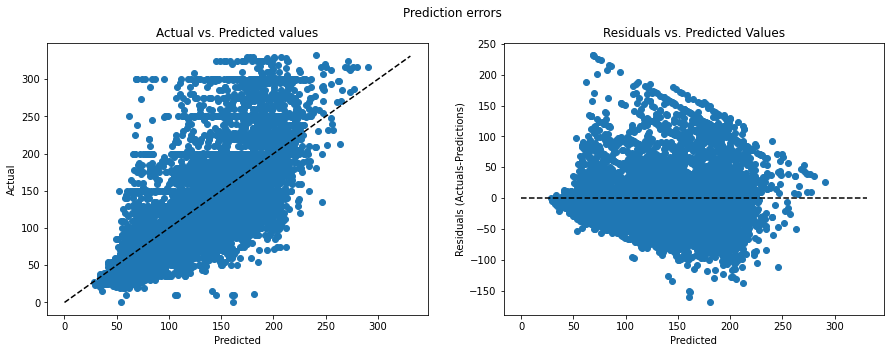

R²: 0.59608290863746
MAE: 30.76292128812871
MSE: 1866.1889787230884
RMSE: 43.19940947192552
MAPE: 105331871406931.16
error_ratio_rmse: 0.3603158086513238
error_ratio_mae: 0.25658607365021135


In [189]:
# Training
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 20, random_state = 18).fit(X_train, y_train)
y_pred_random_forest = rf.predict(X_test)
random_forest_scores=scores(y_test,y_pred_random_forest,plot=True)


In [179]:
# cross_validation
cv_result = cross_validate(rf, X_train, y_train,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,15.311563,0.419459,0.604522,-1869.235225,-30.843870,-5.233525e+13
1,13.420162,0.392858,0.601696,-1853.374799,-30.882992,-5.196006e+13
2,13.080530,0.369388,0.595520,-1861.038405,-30.627868,-7.013205e+13
3,14.128748,0.422586,0.614938,-1797.056259,-30.169393,-2.884187e-01
4,14.263839,0.489045,0.605278,-1805.089398,-30.115908,-1.824794e+14


### Feature selection

['latitude', 'longitude', 'reviews_per_month', 'mean_price_neigh_room', 'Brooklyn', 'Manhattan', 'Queens', 'Bushwick', 'Midtown', 'Entire home/apt', 'Private room', 'Shared room', 'professional', 'seasonal', 'vacation', 'multiprop', 'rookie', 'super_host', 'n_days_log', 'number_of_reviews_quant', 'zero_reviews']
num of feature 21


/Users/liaoyuhsin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/liaoyuhsin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


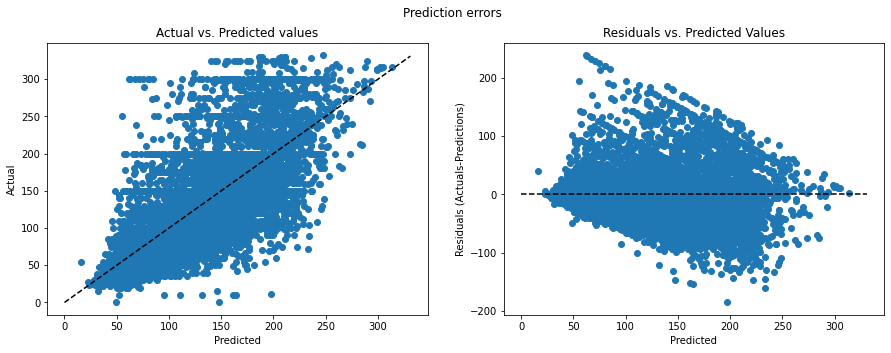

R²: 0.5951046744435615
MAE: 30.204664077920494
MSE: 1870.7086435510985
RMSE: 43.25168948782346
MAPE: 96365275205569.95
error_ratio_rmse: 0.3607518635982511
error_ratio_mae: 0.2519297855066818


In [24]:
imp_feat = rf.feature_importances_
sorted = np.sort(imp_feat)

ind_median = round(len(sorted)/2)

median = sorted[ind_median]
#median =0.0011524354

avg = imp_feat.mean()
#avg = 0.0040816334

important = []
l = list(X_train)
for i in range(len(imp_feat)):
  important.append([imp_feat[i],l[i]])

most_important = []
for x in important:
  if x[0]>avg:
    most_important.append(x[1])

print(most_important)
print("num of feature", len(most_important))

# select features using threshold
selection = SelectFromModel(rf, threshold=avg, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model_rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 20, random_state = 18).fit(X_train, y_train)
selection_model_rf.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_rf = selection_model_rf.predict(select_X_test)
xgb_scores_selection=scores(y_test,y_pred_rf,plot= True)

## 5. XGBOOST

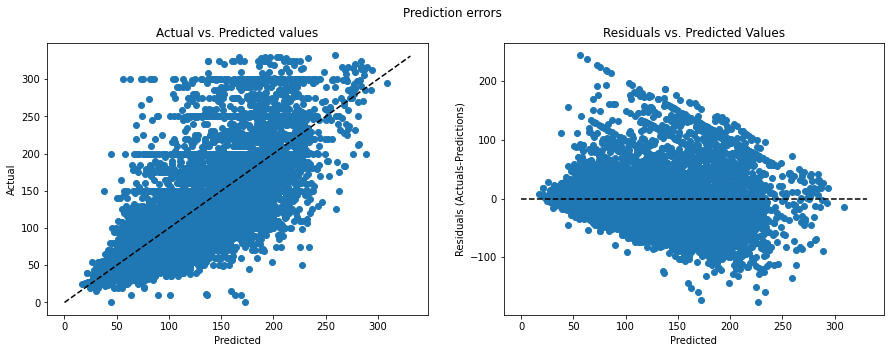

R²: 0.6004926651048692
MAE: 30.198189425343834
MSE: 1845.814899254029
RMSE: 42.962947981418
MAPE: 106365097043604.34
error_ratio_rmse: 0.3583435406456122
error_ratio_mae: 0.25187578199812893


In [25]:
# Before tuning
#xgb = xg.XGBRegressor(n_estimators=1000, learning_rate=0.01).fit(X_train, y_train)
# After hyper-parameter tuning using bayesian search(see below blocks)
#xgb = xg.XGBRegressor(n_estimators=180, colsample_bytree=0.534145326940449, gamma=1.013878917680906, max_depth=18, min_child_weight=1, reg_alpha=58, reg_lambda=0.8886087308195848, seed=0).fit(X_train, y_train)
xgb = xg.XGBRegressor().fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_scores=scores(y_test,y_pred_xgb,plot= True)

#xgb = xg.XGBRegressor(n_estimators=258, colsample_bytree=0.8989653194310321, gamma=1.013878917680906, max_depth=18, min_child_weight=1, reg_alpha=58, reg_lambda=0.8886087308195848, seed=0).fit(X_train, y_train)


In [25]:
# cross_validation
cv_result = cross_validate(xgb, X_train, y_train,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,9.062611,0.037511,0.556473,-2096.342844,-33.129315,-4.942569e+13
1,10.219911,0.038575,0.548007,-2103.195500,-33.172761,-5.569490e+13
2,10.375607,0.039525,0.541264,-2110.676325,-32.879803,-7.838593e+13
3,10.387718,0.034137,0.557790,-2063.763162,-32.634518,-3.099103e-01
4,9.505863,0.040848,0.547419,-2069.680832,-32.688102,-2.074650e+14


### Feature selection

In [29]:
imp_feat = xgb.feature_importances_
sorted = np.sort(imp_feat)

ind_median = round(len(sorted)/2)

median = sorted[ind_median]
#median =0.0011524354

avg = imp_feat.mean()
#avg = 0.0040816334

important = []
l = list(X_train)
for i in range(len(imp_feat)):
  important.append([imp_feat[i],l[i]])

most_important = []
for x in important:
  if x[0]>avg:
    most_important.append(x[1])

print(most_important)
print("num of features", len(most_important))

['latitude', 'longitude', 'reviews_per_month', 'mean_price_neigh_room', 'Bronx', 'Manhattan', 'Astoria', 'Bedford-Stuyvesant', 'Boerum Hill', 'Briarwood', 'Canarsie', 'Chinatown', 'Clason Point', 'Clinton Hill', 'Coney Island', 'Crown Heights', 'Cypress Hills', 'East Elmhurst', 'East Village', 'Edgemere', 'Elmhurst', 'Financial District', 'Flatlands', 'Forest Hills', 'Fresh Meadows', 'Gowanus', 'Greenpoint', 'Greenwich Village', "Hell's Kitchen", 'Jamaica Estates', 'Long Island City', 'Lower East Side', 'Midtown', 'Mill Basin', 'Morningside Heights', 'Morris Park', 'Morrisania', 'Murray Hill', 'NoHo', 'Nolita', 'Norwood', 'Parkchester', 'Pelham Gardens', 'Prospect-Lefferts Gardens', 'Red Hook', 'Rego Park', 'Roosevelt Island', 'Rosedale', 'Shore Acres', 'South Slope', 'St. Albans', 'Sunset Park', 'Theater District', 'Tompkinsville', 'Upper East Side', 'West Village', 'Williamsburg', 'Windsor Terrace', 'Woodside', 'Entire home/apt', 'Private room', 'Shared room', 'event', 'short_term_le

/Users/liaoyuhsin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/liaoyuhsin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


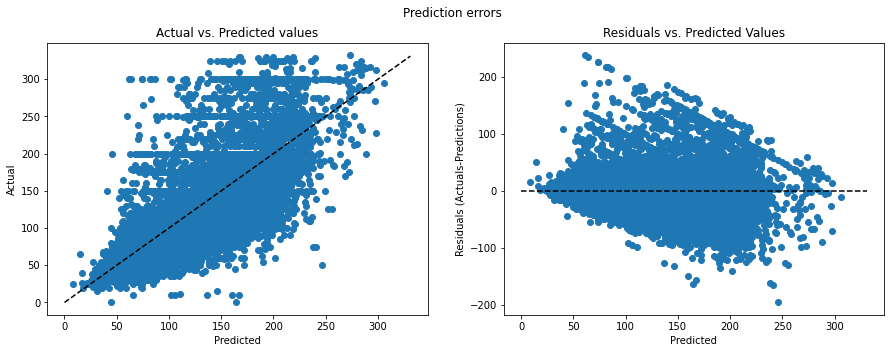

R²: 0.6006578198469434
MAE: 30.143591266579744
MSE: 1845.0518467216314
RMSE: 42.95406670760792
MAPE: 102349366223276.44
error_ratio_rmse: 0.3582694640923942
error_ratio_mae: 0.2514203919831626


In [27]:
from sklearn.feature_selection import SelectFromModel

# select features using threshold
selection = SelectFromModel(xgb, threshold=avg, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model_xgb = xg.XGBRegressor()
selection_model_xgb.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_xgb = selection_model_xgb.predict(select_X_test)
xgb_scores_selection=scores(y_test,y_pred_xgb,plot= True)

## 6. Gradient Boosting (sklearn)

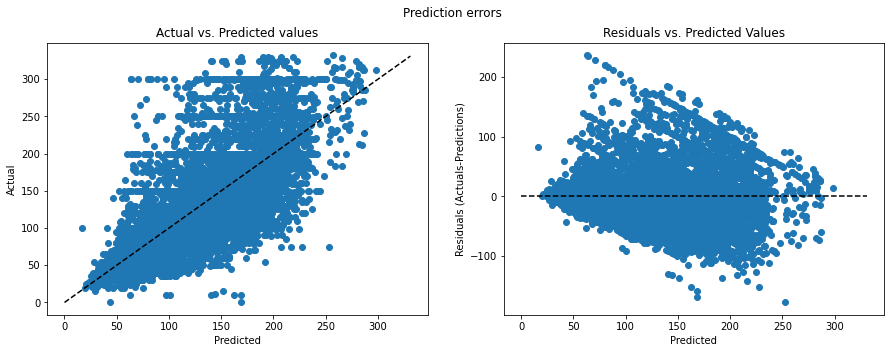

R²: 0.6072133165233911
MAE: 29.95765242104007
MSE: 1814.7639586642733
RMSE: 42.60004646317036
MAPE: 104061115028585.94
error_ratio_rmse: 0.35531666700065717
error_ratio_mae: 0.24986952111920183


In [28]:
gdb = GradientBoostingRegressor(n_estimators = 300, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'squared_error')
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)
gdb_scores=scores(y_test, y_pred, plot= True)

In [ ]:
# cross_validation
cv_result = cross_validate(gdb, X_train, y_train,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,68.584637,0.077317,0.923191,-363.040056,-7.836716,-3.193661e+13
1,68.763394,0.109358,0.927204,-338.731482,-7.579490,-3.267452e+13
2,68.521232,0.072759,0.932042,-312.680186,-7.327688,-5.273736e+13
3,69.070752,0.076227,0.932634,-314.390755,-7.454245,-7.031742e-02
4,69.154214,0.068925,0.924933,-343.288066,-7.610607,-5.698968e+13


### Feature selection

In [30]:
imp_feat = gdb.feature_importances_
sorted = np.sort(imp_feat)

ind_median = round(len(sorted)/2)

median = sorted[ind_median]
#median =0.0011524354

avg = imp_feat.mean()
#avg = 0.0040816334

important = []
l = list(X_train)
for i in range(len(imp_feat)):
  important.append([imp_feat[i],l[i]])

most_important = []
for x in important:
  if x[0]>avg:
    most_important.append(x[1])

print(most_important)
print("num of features", len(most_important))

['latitude', 'longitude', 'reviews_per_month', 'mean_price_neigh_room', 'Entire home/apt', 'vacation', 'multiprop', 'rookie', 'n_days_log', 'number_of_reviews_quant']
num of features 10


/Users/liaoyuhsin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/liaoyuhsin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


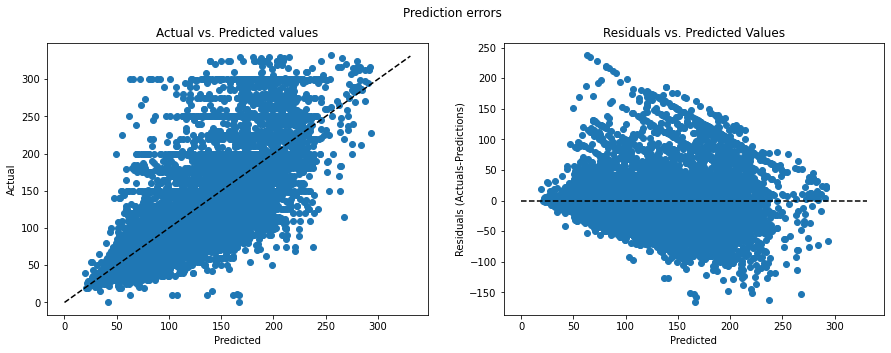

R²: 0.6013415501637565
MAE: 30.149790857009105
MSE: 1841.892856896885
RMSE: 42.91727923455639
MAPE: 102313735444843.08
error_ratio_rmse: 0.3579626286920303
error_ratio_mae: 0.2514721012649831


In [31]:
# select features using threshold
selection = SelectFromModel(gdb, threshold=avg, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model_gdb = GradientBoostingRegressor(n_estimators = 300, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'squared_error')
selection_model_gdb.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_gdb = selection_model_gdb.predict(select_X_test)
xgb_scores_selection=scores(y_test,y_pred_gdb,plot= True)

## 7. Gradient Boosting Decision Tree

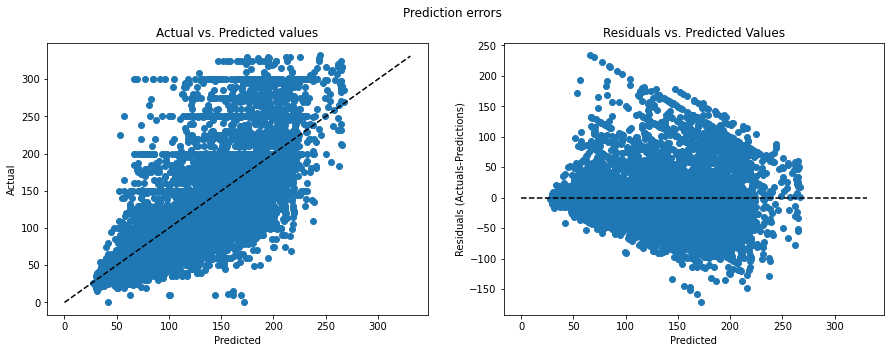

R²: 0.5992640601955834
MAE: 30.4049363786655
MSE: 1851.4913338242518
RMSE: 43.02895924635236
MAPE: 104997680448568.88
error_ratio_rmse: 0.35889412461413556
error_ratio_mae: 0.25360020824799945


In [32]:
# Initialising the GBDT model
gbdt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)

# Training models
gbdt.fit(X_train, y_train)

# Making predictions on the test set
y_gbdt = gbdt.predict(X_test)

xgb_scores=scores(y_test,y_gbdt,plot= True)

### Feature selection

In [33]:
imp_feat = gbdt.feature_importances_
sorted = np.sort(imp_feat)

ind_median = round(len(sorted)/2)

median = sorted[ind_median]
#median =0.0011524354

avg = imp_feat.mean()
#avg = 0.0040816334

important = []
l = list(X_train)
for i in range(len(imp_feat)):
  important.append([imp_feat[i],l[i]])

most_important = []
for x in important:
  if x[0]>avg:
    most_important.append(x[1])

print(most_important)
print("num of features", len(most_important))

['latitude', 'longitude', 'mean_price_neigh_room', 'Entire home/apt', 'vacation', 'rookie']
num of features 6


/Users/liaoyuhsin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/liaoyuhsin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


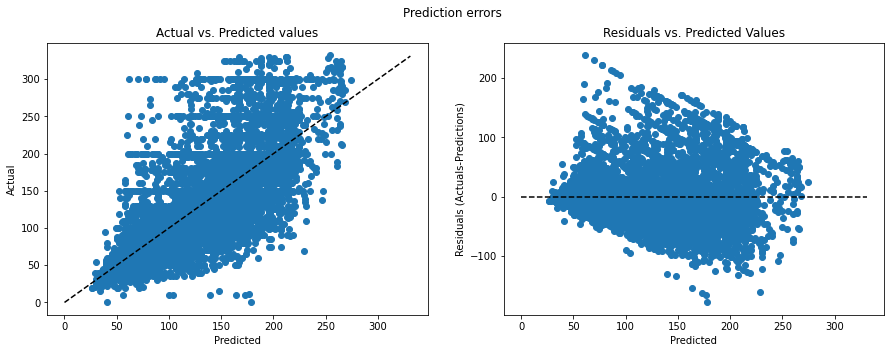

R²: 0.595613810212356
MAE: 30.49742430032594
MSE: 1868.3563203127014
RMSE: 43.2244875078086
MAPE: 107425921480325.62
error_ratio_rmse: 0.3605249784730657
error_ratio_mae: 0.2543716275958778


In [34]:
# select features using threshold
selection = SelectFromModel(gbdt, threshold=avg, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model_gbdt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)
selection_model_gbdt.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_gbdt = selection_model_gbdt.predict(select_X_test)
xgb_scores_selection=scores(y_test,y_pred_gbdt,plot= True)

## 8.Stacking

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

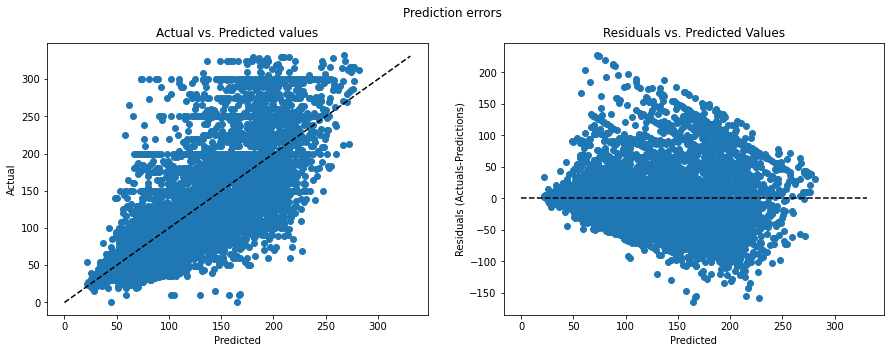

R²: 0.6048416151630773
MAE: 30.078272430058643
MSE: 1825.7217592478273
RMSE: 42.728465444570176
MAPE: 102659209421613.4
error_ratio_rmse: 0.35638777861294263
error_ratio_mae: 0.2508755833922823


In [36]:
# Train multiple base learners
model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = RandomForestRegressor(n_estimators=100, random_state=100)
model2.fit(X_train, y_train)

model3 = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, random_state=100)
model3.fit(X_train, y_train)

# Make predictions on the testing set using the base learners
y_stacking1 = model1.predict(X_test)
y_stacking2 = model2.predict(X_test)
y_stacking3 = model3.predict(X_test)

# Create a design matrix from the predictions of the base learners
X_stack = np.column_stack((y_stacking1, y_stacking2, y_stacking3))

# Train a meta-learner on the design matrix
meta_learner = LinearRegression()
meta_learner.fit(X_stack, y_test)

# Use the base learners to make predictions on the testing set
y_base_pred = np.column_stack((y_stacking1, y_stacking2, y_stacking3))

# Use the meta-learner to make predictions on the testing set and evaluate the performance
y_stack_pred = meta_learner.predict(y_base_pred)


stack_scores=scores(y_test,y_stack_pred,plot= True)

In [37]:
# cross_validation1
cv_result = cross_validate(model1, X_train, y_train, scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,0.637337,0.027552,-8.575574e+12,-4.053266e+16,-2.348841e+06,-5.683755e+13
1,0.554298,0.022038,5.738312e-01,-1.983033e+03,-3.248216e+01,-5.475978e+13
2,0.575633,0.036702,-8.165741e+14,-3.757113e+18,-2.640464e+07,-6.782252e+13
3,0.459694,0.018763,-3.803504e+13,-1.775069e+17,-6.951358e+06,-1.055366e+05
4,0.451998,0.019711,-1.638776e+12,-7.494224e+15,-1.428442e+06,-1.881686e+14


In [38]:
# cross_validation2
cv_result = cross_validate(model2, X_train, y_train, scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,31.093714,0.297693,0.593005,-1923.672858,-30.513475,-3.028758e+13
1,31.395990,0.257096,0.584093,-1935.285640,-30.889516,-3.551634e+13
2,29.472654,0.252668,0.574709,-1956.791069,-30.652450,-5.339711e+13
3,29.657506,0.253422,0.600228,-1865.706400,-30.130596,-2.804934e-01
4,29.536413,0.284003,0.582142,-1910.892297,-30.379786,-1.582391e+14


In [39]:
# cross_validation3
cv_result = cross_validate(model3, X_train, y_train, scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,37.243426,0.072671,0.598962,-1895.518042,-30.139935,-3.579338e+13
1,48.359385,0.032542,0.605457,-1835.871392,-30.370849,-3.145511e+13
2,26.081554,0.034826,0.600617,-1837.586371,-29.808332,-5.638128e+13
3,60.311516,0.034308,0.615575,-1794.086339,-30.069853,-2.848781e-01
4,25.027487,0.027921,0.597838,-1839.112985,-30.438921,-1.825300e+14


### Feature selection - linear regression

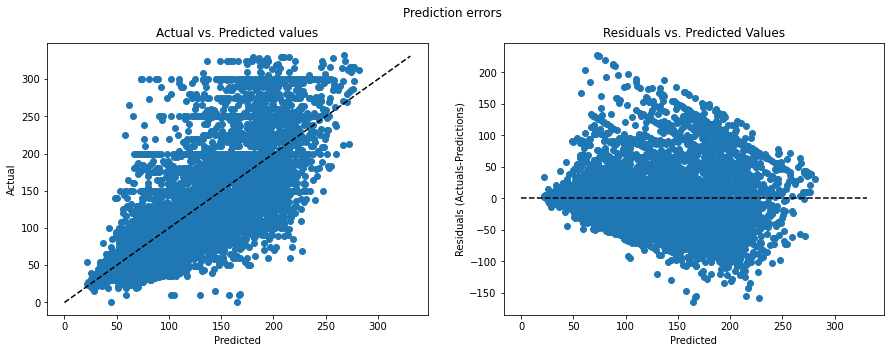

R²: 0.6048416151630773
MAE: 30.078272430058657
MSE: 1825.7217592478273
RMSE: 42.728465444570176
MAPE: 102659209421613.55
error_ratio_rmse: 0.35638777861294263
error_ratio_mae: 0.2508755833922824


In [46]:
# Perform feature selection using RFE
meta_learner = LinearRegression()
rfe = RFE(meta_learner, n_features_to_select=3)
rfe.fit(X_stack, y_test)
selected_features = rfe.support_

# Select the most important features from the design matrix
X_selected = X_stack[:, selected_features]

# Train a meta-learner on the selected features
meta_learner.fit(X_selected, y_test)

# Use the base learners to make predictions on the testing set
y_base_pred = np.column_stack((y_stacking1, y_stacking2, y_stacking3))

# Use the meta-learner to make predictions on the testing set using the selected features
y_stack_pred = meta_learner.predict(X_selected)

stack_scores = scores(y_test, y_stack_pred, plot=True)

### feature selection-random forest

In [56]:
# Compute the feature importance of the base models using Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=100)
rf.fit(X_stack, y_test)
imp_feat = rf.feature_importances_

# Compute the average feature importance
avg = np.mean(imp_feat)

important = []
l = list(X_train)
for i in range(len(imp_feat)):
  important.append([imp_feat[i],l[i]])

most_important = []
for x in important:
  if x[0]>avg:
    most_important.append(x[1])

print(most_important)
print("num of features", len(most_important))


['reviews_per_month']
num of features 1


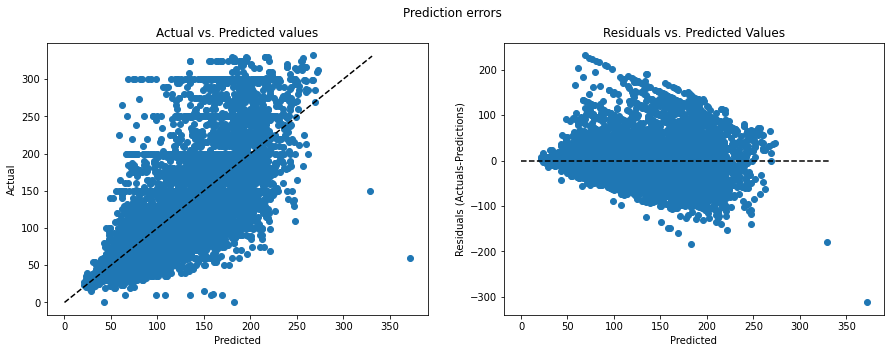

R²: 0.5947441101141282
MAE: 30.53759978568417
MSE: 1872.3745328934863
RMSE: 43.270943286384295
MAPE: 110445519832361.52
error_ratio_rmse: 0.3609124548675036
error_ratio_mae: 0.2547067215860912


In [49]:
# Select the features with importance higher than the average importance
selector = SelectFromModel(rf, threshold=avg, prefit=True)
X_selected = selector.transform(X_stack)

# Train a meta-learner on the selected features
meta_learner = LinearRegression()
meta_learner.fit(X_selected, y_test)

# Use the base learners to make predictions on the testing set
y_base_pred = np.column_stack((y_stacking1, y_stacking2, y_stacking3))

# Use the meta-learner to make predictions on the testing set using the selected features
y_stack_pred = meta_learner.predict(X_selected)

stack_scores = scores(y_test, y_stack_pred, plot=True)

### Feature selection MLRegressor

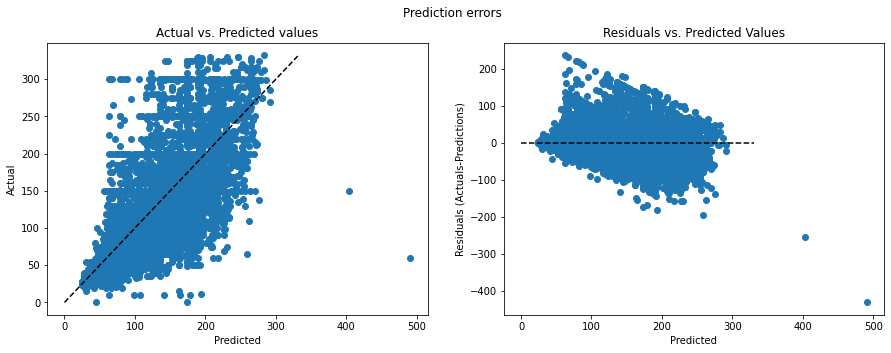

R²: 0.5658329450029149
MAE: 32.15512437007329
MSE: 2005.9507019795406
RMSE: 44.78784100600899
MAPE: 106760487542333.36
error_ratio_rmse: 0.37356453125394407
error_ratio_mae: 0.26819810227305


{'R2': 0.5658329450029149,
 'MAE': 32.15512437007329,
 'MSE': 2005.9507019795406,
 'RMSE': 44.78784100600899,
 'MAPE': 106760487542333.36,
 'error_ratio_rmse': 0.37356453125394407,
 'error_ratio_mae': 0.26819810227305}

In [55]:
# Create an MLPRegressor model
mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, random_state=100)

# Select the top k features using SelectKBest with f_regression scoring
k = 30
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector and transform the input data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Fit the MLPRegressor model on the selected features
mlp.fit(X_train_selected, y_train)

# Evaluate the model on the test set
y_pred = mlp.predict(X_test_selected)
scores(y_test, y_pred, plot=True)